In [21]:
#Placeholder
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [43]:
#Load train data 
df = pd.read_csv("understanding_cloud_organization/train.csv")

path = "understanding_cloud_organization/"

In [44]:
#Extract file names and labels 
names = df['Image_Label'].str.split("_",expand=True)
df['Image'] = names[0]
test = df['EncodedPixels'] 
df['Label_Present'] = df['EncodedPixels'].map(lambda x: 0 if x is np.nan else 1)

In [45]:
#Descriptive stats about data 
#pie chart of each type
#Histogram number of labels per image 
#Dist of train/val 
print(df.head())

          Image_Label                                      EncodedPixels  \
0    0011165.jpg_Fish  264918 937 266318 937 267718 937 269118 937 27...   
1  0011165.jpg_Flower  1355565 1002 1356965 1002 1358365 1002 1359765...   
2  0011165.jpg_Gravel                                                NaN   
3   0011165.jpg_Sugar                                                NaN   
4    002be4f.jpg_Fish  233813 878 235213 878 236613 878 238010 881 23...   

         Image  Label_Present  
0  0011165.jpg              1  
1  0011165.jpg              1  
2  0011165.jpg              0  
3  0011165.jpg              0  
4  002be4f.jpg              1  


There are 5546 images in train dataset
There are 3698 images in test dataset


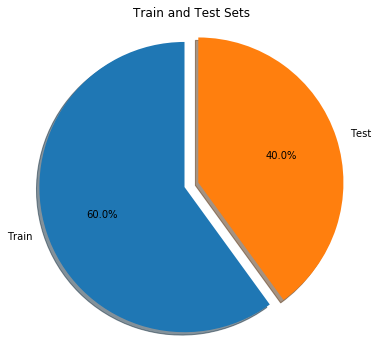

In [46]:
#Number of train and test images 
n_train = len(os.listdir(f'{path}/train_images'))
n_test = len(os.listdir(f'{path}/test_images'))
print(f'There are {n_train} images in train dataset')
print(f'There are {n_test} images in test dataset')

# plotting a pie chart which demonstrates train and test sets
labels = 'Train', 'Test'
sizes = [n_train, n_test]
explode = (0, 0.1)

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Train and Test Sets')

plt.show()

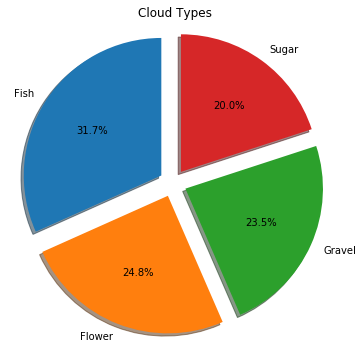

In [47]:
#Number of each label in train 
nums = df.loc[df['EncodedPixels'].isnull() == False, 'Image_Label'].apply(lambda x: x.split('_')[1]).value_counts()

# plotting a pie chart
labels = 'Fish', 'Flower', 'Gravel', 'Sugar'
sizes =  nums.tolist()
explode = (0.1, 0.1, 0.1, 0.1)

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Cloud Types')

plt.show()

Text(0.5, 1.0, 'Number of Labels per Image')

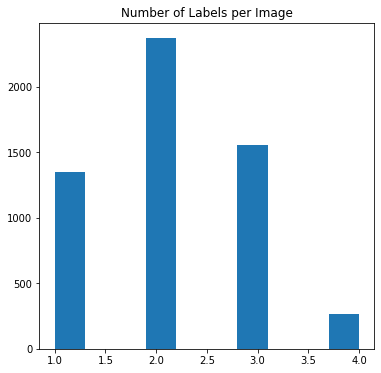

In [48]:
#Histogram of num of labels
fig, ax = plt.subplots(figsize=(6, 6))
ax.hist(df.groupby('Image')['EncodedPixels'].count())
ax.set_title('Number of Labels per Image')

In [8]:
#Split into train and test/val

#Extract mask 

#Train model on mask

#Mask extraction for test data 

#Test Classification 

In [17]:
#Define function to convert RLE to mask (Source: https://www.kaggle.com/ekhtiar/eda-find-me-in-the-clouds)
def rle_to_mask(rle_string, width, height):
    '''
    convert RLE(run length encoding) string to numpy array

    Parameters: 
    rle_string (str): string of rle encoded mask
    height (int): height of the mask
    width (int): width of the mask

    Returns: 
    numpy.array: numpy array of the mask
    '''
    
    rows, cols = height, width
    
    if rle_string == -1:
        return np.zeros((height, width))
    else:
        rle_numbers = [int(num_string) for num_string in rle_string.split(' ')]
        rle_pairs = np.array(rle_numbers).reshape(-1,2)
        img = np.zeros(rows*cols, dtype=np.uint8)
        for index, length in rle_pairs:
            index -= 1
            img[index:index+length] = 255
        img = img.reshape(cols,rows)
        img = img.T
        return img

In [ ]:
#Define function to visualise samples
def show_samples(samples):
    for sample in samples:
        fig, axes = plt.subplots(1, 1, figsize=(15, 10))
        img_path = os.path.join(DATASET_DIR, 'train_images', sample[0])
        img = cv2.imread(img_path, 1)

        # Get annotations
        labels = df[df['Image_Label'].str.contains(sample[0])]['EncodedPixels']

        patches = []
        for idx, rle in enumerate(labels.values):
            if rle is not np.nan:
                mask = rle2mask(rle)
                contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
                for contour in contours:
                    poly_patch = Polygon(contour.reshape(-1, 2), closed=True, linewidth=2, edgecolor=COLORS[idx], fill=False)
                    patches.append(poly_patch)
        p = PatchCollection(patches, match_original=True, cmap=matplotlib.cm.jet)

        axes.imshow(img/255)
        axes.set_title('{} - ({})'.format(sample[0], ', '.join(sample[1].astype(np.str))))
        axes.add_collection(p)
        plt.show()

In [18]:
mask = rle_to_mask(train["EncodedPixels"][1],2100,1400)

In [19]:
print(mask)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
